In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
get_ipython().run_line_magic('matplotlib', 'inline')
plt.style.use('classic')

In [2]:
# Import the data set
df = pd.read_csv('Necessary Insurance DB.csv')

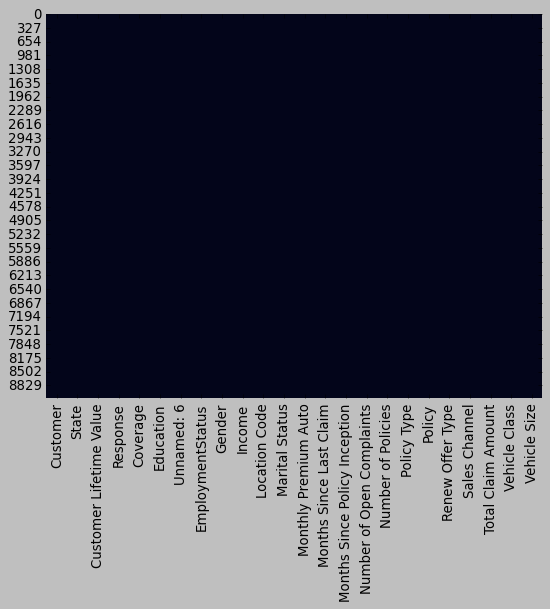

In [3]:
sns.heatmap(df.isnull() | df.isna(), cbar=False)

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Unnamed: 6,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,"$2,764",No,Basic,Bachelor,2/24/11,Employed,F,"$56,274",Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,$385,Two-Door Car,Medsize
1,QZ44356,Arizona,"$6,980",No,Extended,Bachelor,1/31/11,Unemployed,F,$0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,"$1,131",Four-Door Car,Medsize
2,AI49188,Nevada,"$12,887",No,Premium,Bachelor,2/19/11,Employed,F,"$48,767",Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,$566,Two-Door Car,Medsize
3,WW63253,California,"$7,646",No,Basic,Bachelor,1/20/11,Unemployed,M,$0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,$530,SUV,Medsize
4,HB64268,Washington,"$2,814",No,Basic,Bachelor,11-3-02,Employed,M,"$43,836",Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,$138,Four-Door Car,Medsize


In [6]:
df.drop(['Unnamed: 6', 'Response', 'Customer'], axis=1, inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   State                          9134 non-null   object
 1   Customer Lifetime Value        9134 non-null   object
 2   Coverage                       9134 non-null   object
 3   Education                      9134 non-null   object
 4   EmploymentStatus               9134 non-null   object
 5   Gender                         9134 non-null   object
 6   Income                         9134 non-null   object
 7   Location Code                  9134 non-null   object
 8   Marital Status                 9134 non-null   object
 9   Monthly Premium Auto           9134 non-null   int64 
 10  Months Since Last Claim        9134 non-null   int64 
 11  Months Since Policy Inception  9134 non-null   int64 
 12  Number of Open Complaints      9134 non-null   int64 
 13  Num

In [8]:
for c in ['Customer Lifetime Value', 'Income', 'Total Claim Amount']:
    df[c] = df[c].replace('[\$,]', '', regex=True).astype(float)


In [9]:
df.columns

Index(['State', 'Customer Lifetime Value', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [10]:
df.head()

,State,Customer Lifetime Value,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Washington,2764.0,Basic,Bachelor,Employed,F,56274.0,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,385.0,Two-Door Car,Medsize
1,Arizona,6980.0,Extended,Bachelor,Unemployed,F,0.0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.0,Four-Door Car,Medsize
2,Nevada,12887.0,Premium,Bachelor,Employed,F,48767.0,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.0,Two-Door Car,Medsize
3,California,7646.0,Basic,Bachelor,Unemployed,M,0.0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,530.0,SUV,Medsize
4,Washington,2814.0,Basic,Bachelor,Employed,M,43836.0,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.0,Four-Door Car,Medsize


In [11]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.945697,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.087475
std,6870.968043,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.493757
min,1898.000000,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,3994.250000,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.000000
50%,5780.000000,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,384.000000
75%,8962.250000,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.750000
max,83325.000000,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.000000


In [12]:
for i in ['Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount']:
    print(i)
    print(df[i].median())

Customer Lifetime Value
5780.0
Income
33889.5
Monthly Premium Auto
83.0
Months Since Last Claim
14.0
Months Since Policy Inception
48.0
Number of Open Complaints
0.0
Number of Policies
2.0
Total Claim Amount
384.0


In [13]:
for i in ['State', 'Coverage', 'Education', 'EmploymentStatus', 'Gender', 
          'Marital Status', 'Location Code', 'Policy Type', 'Policy',
         'Vehicle Class', 'Vehicle Size', 'Renew Offer Type', 'Sales Channel']:
    print(i)
    print(df[i].unique())
    print()

State
['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']

Coverage
['Basic' 'Extended' 'Premium']

Education
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']

EmploymentStatus
['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']

Gender
['F' 'M']

Marital Status
['Married' 'Single' 'Divorced']

Location Code
['Suburban' 'Rural' 'Urban']

Policy Type
['Corporate Auto' 'Personal Auto' 'Special Auto']

Policy
['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']

Vehicle Class
['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']

Vehicle Size
['Medsize' 'Small' 'Large']

Renew Offer Type
['Offer1' 'Offer3' 'Offer2' 'Offer4']

Sales Channel
['Agent' 'Call Center' 'Web' 'Branch']



In [14]:
# sns.pairplot(df[['Customer Lifetime Value', 'Coverage', 'Education', 'EmploymentStatus', 'Gender', 'Income', 'Location Code',
#        'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
#        'Months Since Policy Inception', 'Number of Open Complaints', 'Policy', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size']], hue='Policy')

In [15]:
#sns.countplot(df['Customer Lifetime Value'], hue=df['Coverage'])

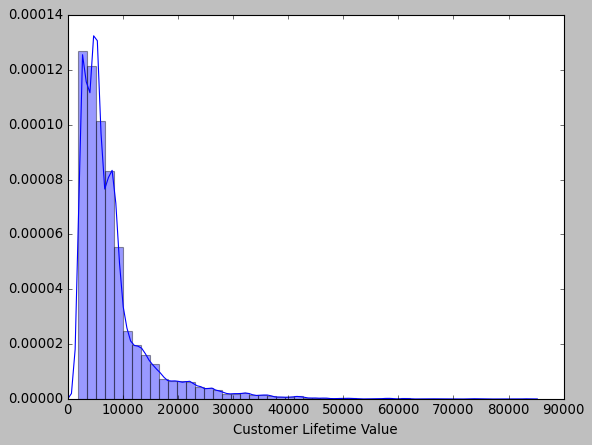

In [16]:
sns.distplot(df['Customer Lifetime Value'])

## Pre-processing

In [17]:
# remove outliers
dfc = df[np.abs(df['Customer Lifetime Value'] - df['Customer Lifetime Value'].mean()) <= (3*df['Customer Lifetime Value'].std())].copy()

In [18]:
dfc = dfc[dfc['Months Since Policy Inception'] != 0]

In [19]:
# remove multi-vehicle policies
dfc = dfc[dfc['Number of Policies'] <= 3]
dfc.drop('Number of Policies', axis=1, inplace=True)
dfc.drop('Monthly Premium Auto', axis=1, inplace=True)

In [20]:
dfc['Customer Lifetime Value'] = dfc['Customer Lifetime Value'] / dfc['Months Since Policy Inception']
dfc.drop('Months Since Policy Inception', axis=1, inplace=True)

In [21]:
#for c in ['Monthly Premium Auto', 'Renew Offer Type', 'Sales Channel', 'Policy', 'Vehicle Class', 'Number of Open Complaints']:
for c in ['Policy', 'Vehicle Class', 'Renew Offer Type', 'Sales Channel']:
    dfc.drop(c, axis=1, inplace=True)

In [22]:
dfc.head()

,State,Customer Lifetime Value,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Months Since Last Claim,Number of Open Complaints,Policy Type,Total Claim Amount,Vehicle Size
0,Washington,552.800000,Basic,Bachelor,Employed,F,56274.0,Suburban,Married,32,0,Corporate Auto,385.0,Medsize
2,Nevada,339.131579,Premium,Bachelor,Employed,F,48767.0,Suburban,Married,18,0,Personal Auto,566.0,Medsize
4,Washington,63.954545,Basic,Bachelor,Employed,M,43836.0,Rural,Single,12,0,Personal Auto,138.0,Medsize
5,Oregon,87.829787,Basic,Bachelor,Employed,F,62902.0,Rural,Married,14,0,Personal Auto,159.0,Medsize
8,Oregon,8042.666667,Basic,Bachelor,Medical Leave,M,14072.0,Suburban,Divorced,13,0,Corporate Auto,511.0,Medsize


In [23]:
# take care of the categorical features
cat_cols = ['Gender', 'State', 'Location Code', 'Policy Type', 'EmploymentStatus', 'Marital Status'];
for i in  cat_cols:
    dfc[i] = dfc[i].astype('category')

In [24]:
# cat_feature_mask = []
# for col in dfc.columns:
#     cat_feature_mask.append(col in cat_cols)

# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder(categories = cat_cols, sparse=False ) 
# add ohe.fit_trasnform

In [25]:
# encode labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

ord_cols = ['Coverage', 'Education', 'Vehicle Size']
dfc[ord_cols] = dfc[ord_cols].apply(lambda col: le.fit_transform(col))

# dfc['Coverage'] = dfc['Coverage'].replace({0:'Basic', 1:'Extended', 2:'Premium'});
# dfc['Education'] = dfc['Education'].replace({2:'Bachelor', 1:'College', 3:'Master', 0:'High School or Below', 4:'Doctor'})

In [26]:
dfc.head()

,State,Customer Lifetime Value,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Months Since Last Claim,Number of Open Complaints,Policy Type,Total Claim Amount,Vehicle Size
0,Washington,552.800000,0,0,Employed,F,56274.0,Suburban,Married,32,0,Corporate Auto,385.0,1
2,Nevada,339.131579,2,0,Employed,F,48767.0,Suburban,Married,18,0,Personal Auto,566.0,1
4,Washington,63.954545,0,0,Employed,M,43836.0,Rural,Single,12,0,Personal Auto,138.0,1
5,Oregon,87.829787,0,0,Employed,F,62902.0,Rural,Married,14,0,Personal Auto,159.0,1
8,Oregon,8042.666667,0,0,Medical Leave,M,14072.0,Suburban,Divorced,13,0,Corporate Auto,511.0,1


In [27]:
# set dummy values
for i in cat_cols:
    df_dum = pd.get_dummies(dfc[i], drop_first=True)
    
    cols = []
    for c in df_dum:
        cols.append("%s%s" % (i, str(df_dum[c].name)))
    df_dum.columns = cols;
    dfc = pd.concat([dfc, df_dum],axis=1)
    dfc = dfc.drop(i, axis=1)

In [28]:
dfc.head(50)

,Customer Lifetime Value,Coverage,Education,Income,Months Since Last Claim,Number of Open Complaints,Total Claim Amount,Vehicle Size,GenderM,StateCalifornia,StateNevada,StateOregon,StateWashington,Location CodeSuburban,Location CodeUrban,Policy TypePersonal Auto,Policy TypeSpecial Auto,EmploymentStatusEmployed,EmploymentStatusMedical Leave,EmploymentStatusRetired,EmploymentStatusUnemployed,Marital StatusMarried,Marital StatusSingle
0,552.800000,0,0,56274.0,32,0,385.0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0
2,339.131579,2,0,48767.0,18,0,566.0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0
4,63.954545,0,0,43836.0,12,0,138.0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1
5,87.829787,0,0,62902.0,14,0,159.0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
8,8042.666667,0,0,14072.0,13,0,511.0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0
10,947.800000,0,1,0.0,23,0,482.0,2,1,1,0,0,0,1,0,1,0,0,0,0,1,0,1
11,94.218391,0,1,0.0,27,0,528.0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0
12,107.304878,2,4,77026.0,9,2,472.0,1,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0
15,149.260000,0,0,24599.0,12,1,43.0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
16,366.714286,0,3,25049.0,14,0,454.0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0


In [29]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6452 entries, 0 to 9133
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer Lifetime Value        6452 non-null   float64
 1   Coverage                       6452 non-null   int32  
 2   Education                      6452 non-null   int32  
 3   Income                         6452 non-null   float64
 4   Months Since Last Claim        6452 non-null   int64  
 5   Number of Open Complaints      6452 non-null   int64  
 6   Total Claim Amount             6452 non-null   float64
 7   Vehicle Size                   6452 non-null   int32  
 8   GenderM                        6452 non-null   uint8  
 9   StateCalifornia                6452 non-null   uint8  
 10  StateNevada                    6452 non-null   uint8  
 11  StateOregon                    6452 non-null   uint8  
 12  StateWashington                6452 non-null   u

In [30]:
dfc.describe()

,Customer Lifetime Value,Coverage,Education,Income,Months Since Last Claim,Number of Open Complaints,Total Claim Amount,Vehicle Size,GenderM,StateCalifornia,StateNevada,StateOregon,StateWashington,Location CodeSuburban,Location CodeUrban,Policy TypePersonal Auto,Policy TypeSpecial Auto,EmploymentStatusEmployed,EmploymentStatusMedical Leave,EmploymentStatusRetired,EmploymentStatusUnemployed,Marital StatusMarried,Marital StatusSingle
count,6452.000000,6452.000000,6452.000000,6452.000000,6452.000000,6452.000000,6452.000000,6452.000000,6452.000000,6452.000000,6452.000000,6452.000000,6452.000000,6452.000000,6452.000000,6452.000000,6452.000000,6452.000000,6452.000000,6452.000000,6452.000000,6452.000000,6452.000000
mean,391.533859,0.476751,1.549597,37850.269684,15.041073,0.384687,426.504340,1.082610,0.487756,0.344389,0.100899,0.284718,0.088190,0.635927,0.169870,0.743335,0.042622,0.621513,0.046187,0.034873,0.250465,0.574861,0.269839
std,1075.128116,0.655222,1.382348,30359.514471,10.048496,0.911458,281.406606,0.541985,0.499889,0.475206,0.301218,0.451315,0.283593,0.481207,0.375547,0.436827,0.202020,0.485048,0.209907,0.183472,0.433314,0.494402,0.443910
min,20.781250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,68.202303,0.000000,0.000000,0.000000,6.000000,0.000000,274.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,135.561401,0.000000,1.000000,34142.500000,14.000000,0.000000,379.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,298.864583,1.000000,3.000000,62399.250000,23.000000,0.000000,542.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,24707.000000,2.000000,4.000000,99981.000000,35.000000,5.000000,2893.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
# import h2o
# from h2o.automl import H2OAutoML
# h2o.init()

# h2o_df = h2o.import_file('Necessary Insurance DB.csv')
# splits = h2o_df.split_frame(ratios=[0.8],seed=1)
# train = splits[0]
# test = splits[1]
# y = "Customer Lifetime Value" 
# x = h2o_df.columns 
# x.remove(y) 

# aml = H2OAutoML(max_runtime_secs=1200, seed=1)
# aml.train(x=x,y=y, training_frame=train)

# lb = aml.leaderboard
# lb.head()


# Analysis

## 1)	Which characteristics are most useful in determining the value of the customers?

We are looking for customers that bring the most profit. Such customers include people who paid the most premiums with the fewest claims. Intuition suggest that customer gender, marital status, education, income level, employment status and location would contribute to how much profit they bring over the lifetime.

In [32]:
import sklearn
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures 
from sklearn import svm

In [33]:
from sklearn import metrics

def get_metrics(reg, y_test, y_pred):
    res = []
    
    res.append(str(reg.__class__.__name__))
    mae = metrics.mean_absolute_error(y_test, y_pred)
    res.append(mae)
    mse = metrics.mean_squared_error(y_test, y_pred)
    res.append(mse)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    res.append(rmse)
    r2 = metrics.r2_score(y_test, y_pred)
    res.append(r2)
    
    return res
               
def show_metrics(res):
    print(res[0])
    print(' MAE : ', res[1])
    print(' MSE : ', res[2])
    print(' RMSE: ', res[3])
    print(' R^2 : ', res[4])

In [34]:
y = dfc['Customer Lifetime Value']
X = dfc.drop('Customer Lifetime Value', axis = 1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

In [35]:
def show_importances(model):
    if (hasattr(model, 'coef_')):
       imps = model.coef_ 
    elif (hasattr(model, 'feature_importances_')):
        imps = model.feature_importances_
    else:
        print("Unable to find feature importance array on %s" % (model))
        return;
    
    for i,v in enumerate(imps):
        print('Feature: %0d, Score: %.5f' % (i,v))
    # plot feature importance
    plt.bar([x for x in range(len(imps))], imps)
    plt.xticks(range(len(X.columns)), X.columns, rotation=90)
    plt.show()

In [36]:
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size = 1/3, random_state = 0)

In [37]:
# Start with plolynomial regression
pf = PolynomialFeatures(degree=2)
X_poly_train = pf.fit_transform(X_train)
X_poly_test = pf.fit_transform(X_test)

In [38]:
lr = LinearRegression()
lr.fit(X_poly_train, y_train)
y_pred = lr.predict(X_poly_test)

In [39]:
results = []
m = get_metrics(lr, y_test, y_pred)
m[0] = 'PolynomialRegression'
show_metrics(m)
results.append(m)

PolynomialRegression
 MAE :  482.23127003245617
 MSE :  1094723.0688483568
 RMSE:  1046.2901456328243
 R^2 :  -0.0130728925522976


In [40]:
regressors = [
    Ridge(alpha=.5),
    Lasso(alpha=0.1),
    LinearRegression(), 
    DecisionTreeRegressor(), 
    RandomForestRegressor(),
    GradientBoostingRegressor(), 
    xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, 
                     max_depth = 5, alpha = 10, n_estimators = 10), 
    # svm.SVC(kernel='rbf', gamma=0.7, C=1.0),
    KNeighborsRegressor(n_neighbors=3)
]

### Commented out regressors are processing over 100 minutes

Running Ridge(alpha=0.5)
Ridge
 MAE :  432.0973470925449
 MSE :  1077180.8893807156
 RMSE:  1037.8732530423526
 R^2 :  0.00316089935422581
Feature: 0, Score: 67.54690
Feature: 1, Score: 13.75127
Feature: 2, Score: 68.61159
Feature: 3, Score: 19.51868
Feature: 4, Score: -21.49792
Feature: 5, Score: 9.96278
Feature: 6, Score: -55.56346
Feature: 7, Score: 13.12555
Feature: 8, Score: 4.55492
Feature: 9, Score: -0.70062
Feature: 10, Score: 30.72564
Feature: 11, Score: 26.17823
Feature: 12, Score: 22.43671
Feature: 13, Score: 4.29850
Feature: 14, Score: -14.44297
Feature: 15, Score: 4.78789
Feature: 16, Score: 15.10931
Feature: 17, Score: 45.76223
Feature: 18, Score: -0.56554
Feature: 19, Score: 49.52445
Feature: 20, Score: 9.92210
Feature: 21, Score: 14.57731


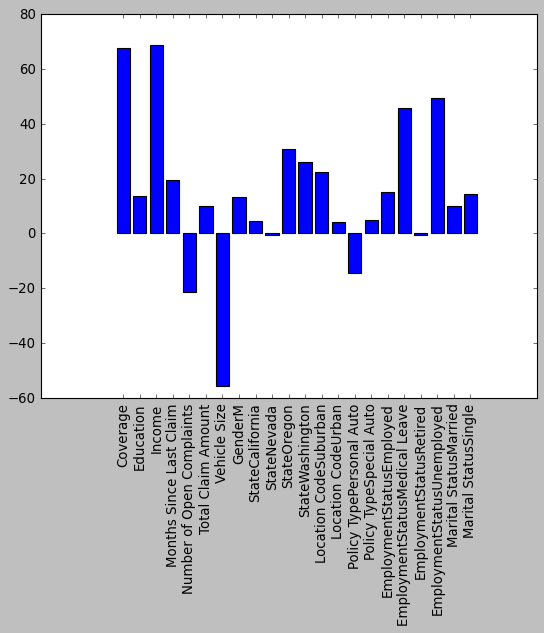


Running Lasso(alpha=0.1)
Lasso
 MAE :  432.0367956721598
 MSE :  1077118.9075017886
 RMSE:  1037.8433925702802
 R^2 :  0.0032182583002068332
Feature: 0, Score: 67.44046
Feature: 1, Score: 13.65773
Feature: 2, Score: 68.36153
Feature: 3, Score: 19.41627
Feature: 4, Score: -21.38941
Feature: 5, Score: 10.06728
Feature: 6, Score: -55.43099
Feature: 7, Score: 13.06335
Feature: 8, Score: 4.24720
Feature: 9, Score: -0.76281
Feature: 10, Score: 30.42040
Feature: 11, Score: 25.95767
Feature: 12, Score: 22.00238
Feature: 13, Score: 4.01706
Feature: 14, Score: -14.36480
Feature: 15, Score: 4.71816
Feature: 16, Score: 14.22560
Feature: 17, Score: 45.27724
Feature: 18, Score: -0.82097
Feature: 19, Score: 48.58337
Feature: 20, Score: 9.62755
Feature: 21, Score: 14.30632


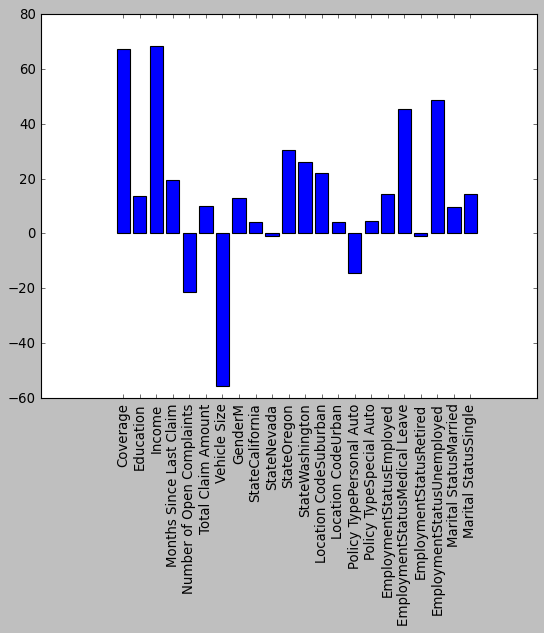


Running LinearRegression()
LinearRegression
 MAE :  432.1004036557645
 MSE :  1077183.580690938
 RMSE:  1037.874549592068
 R^2 :  0.0031584087760059276
Feature: 0, Score: 67.55645
Feature: 1, Score: 13.75263
Feature: 2, Score: 68.64047
Feature: 3, Score: 19.52166
Feature: 4, Score: -21.50096
Feature: 5, Score: 9.95526
Feature: 6, Score: -55.57084
Feature: 7, Score: 13.12576
Feature: 8, Score: 4.56279
Feature: 9, Score: -0.69588
Feature: 10, Score: 30.73580
Feature: 11, Score: 26.18528
Feature: 12, Score: 22.45197
Feature: 13, Score: 4.30415
Feature: 14, Score: -14.44451
Feature: 15, Score: 4.78779
Feature: 16, Score: 15.14238
Feature: 17, Score: 45.78739
Feature: 18, Score: -0.54838
Feature: 19, Score: 49.57953
Feature: 20, Score: 9.92554
Feature: 21, Score: 14.57877


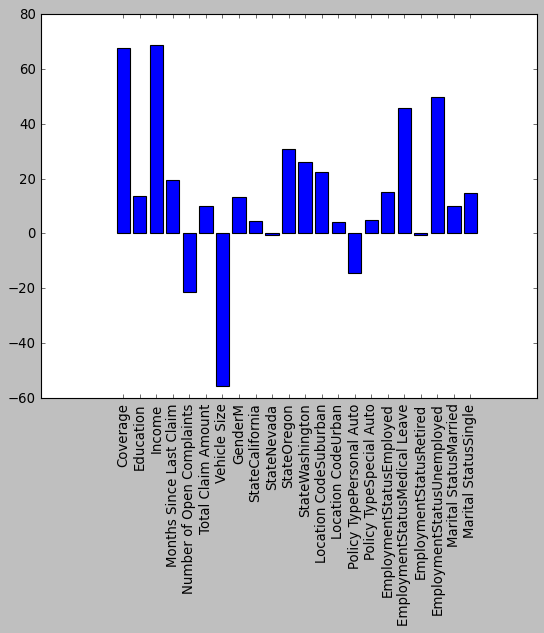


Running DecisionTreeRegressor()
DecisionTreeRegressor
 MAE :  506.0360010947135
 MSE :  2684033.6001090882
 RMSE:  1638.3020478864964
 R^2 :  -1.4838443258810408
Feature: 0, Score: 0.02472
Feature: 1, Score: 0.03686
Feature: 2, Score: 0.29105
Feature: 3, Score: 0.19067
Feature: 4, Score: 0.01086
Feature: 5, Score: 0.22704
Feature: 6, Score: 0.02024
Feature: 7, Score: 0.00452
Feature: 8, Score: 0.01953
Feature: 9, Score: 0.00276
Feature: 10, Score: 0.01270
Feature: 11, Score: 0.02766
Feature: 12, Score: 0.00265
Feature: 13, Score: 0.02139
Feature: 14, Score: 0.07738
Feature: 15, Score: 0.00652
Feature: 16, Score: 0.00210
Feature: 17, Score: 0.00334
Feature: 18, Score: 0.00058
Feature: 19, Score: 0.00701
Feature: 20, Score: 0.00532
Feature: 21, Score: 0.00511


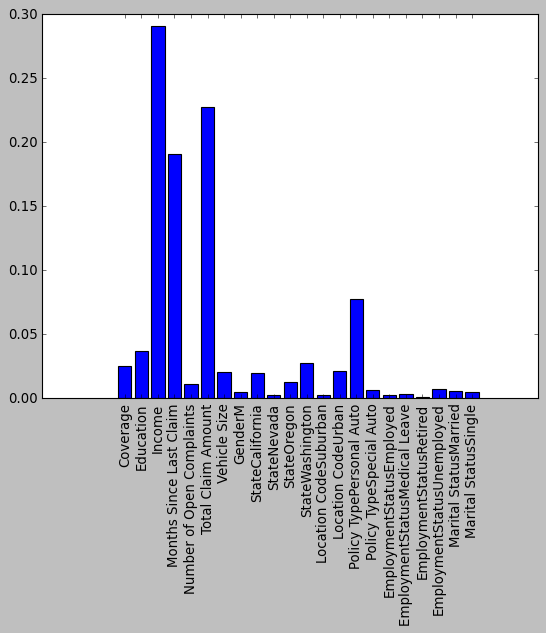


Running RandomForestRegressor()
RandomForestRegressor
 MAE :  407.19255326464025
 MSE :  799319.2443877296
 RMSE:  894.0465560516016
 R^2 :  0.26029816852542753
Feature: 0, Score: 0.03347
Feature: 1, Score: 0.07037
Feature: 2, Score: 0.31009
Feature: 3, Score: 0.11970
Feature: 4, Score: 0.02028
Feature: 5, Score: 0.22856
Feature: 6, Score: 0.02179
Feature: 7, Score: 0.01565
Feature: 8, Score: 0.01255
Feature: 9, Score: 0.00608
Feature: 10, Score: 0.01599
Feature: 11, Score: 0.02394
Feature: 12, Score: 0.00583
Feature: 13, Score: 0.02037
Feature: 14, Score: 0.02388
Feature: 15, Score: 0.00816
Feature: 16, Score: 0.00656
Feature: 17, Score: 0.01096
Feature: 18, Score: 0.00339
Feature: 19, Score: 0.00552
Feature: 20, Score: 0.02140
Feature: 21, Score: 0.01545


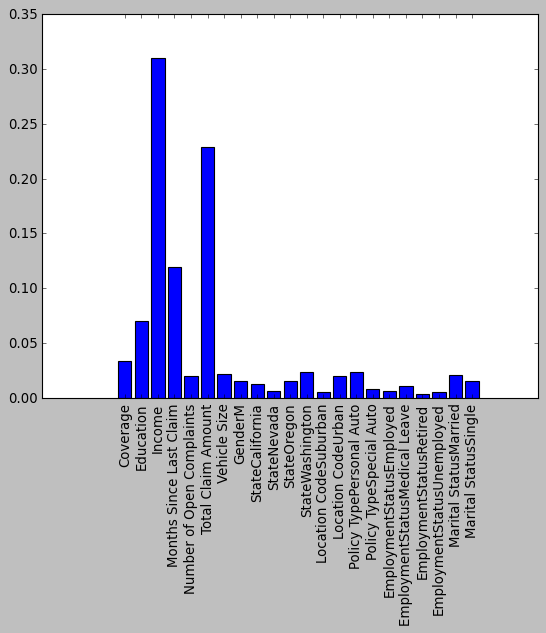


Running GradientBoostingRegressor()
GradientBoostingRegressor
 MAE :  419.56080616689434
 MSE :  960579.326459224
 RMSE:  980.0914888209284
 R^2 :  0.11106570741610566
Feature: 0, Score: 0.02572
Feature: 1, Score: 0.00353
Feature: 2, Score: 0.57363
Feature: 3, Score: 0.05332
Feature: 4, Score: 0.02213
Feature: 5, Score: 0.26355
Feature: 6, Score: 0.00811
Feature: 7, Score: 0.00220
Feature: 8, Score: 0.00157
Feature: 9, Score: 0.00048
Feature: 10, Score: 0.00224
Feature: 11, Score: 0.00851
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00551
Feature: 14, Score: 0.00062
Feature: 15, Score: 0.00699
Feature: 16, Score: 0.00096
Feature: 17, Score: 0.01526
Feature: 18, Score: 0.00190
Feature: 19, Score: 0.00326
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00050


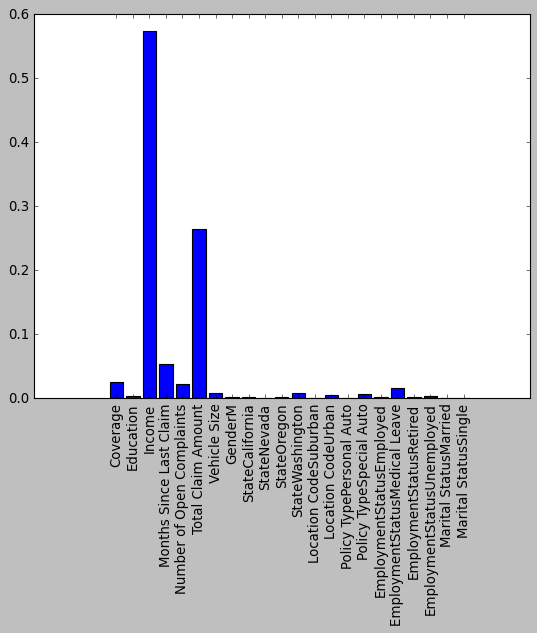


Running XGBRegressor(alpha=10, base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=0.3, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=None, max_depth=5,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)
XGBRegressor
 MAE :  355.17892311246584
 MSE :  1011304.6918735473
 RMSE:  1005.6364610899643
 R^2 :  0.06412370525283606
Feature: 0, Score: 0.11159
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.19125
Feature: 3, Score: 0.06002
Feature: 4, Score: 0.00531
Feature: 5, Score: 0.09746
Feature: 6, Score: 0.02061
Feature: 7, Score: 0.21760
Feature: 8, Score: 0.08442

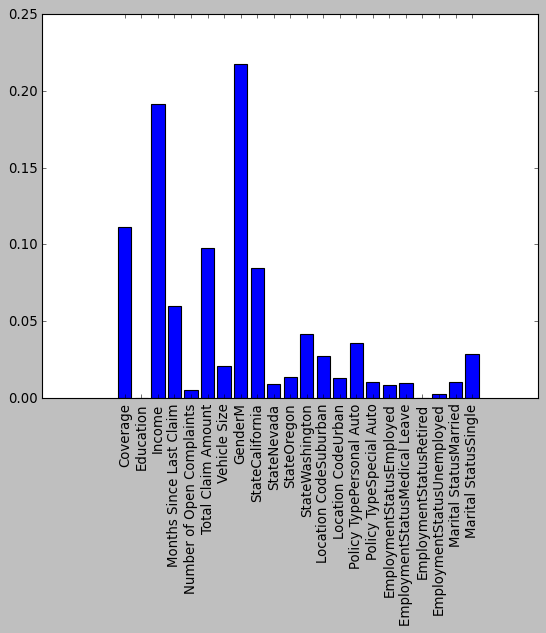


Running KNeighborsRegressor(n_neighbors=3)
KNeighborsRegressor
 MAE :  455.6703440408431
 MSE :  1226527.3810895341
 RMSE:  1107.4869665551528
 R^2 :  -0.13504654931784454
Unable to find feature importance array on KNeighborsRegressor(n_neighbors=3)



In [41]:
for r in regressors: 
    print('======================================================================================')
    print('Running %s' % (r))
    r.fit(X_train, y_train)
    m = get_metrics(r, y_test, r.predict(X_test))
    show_metrics(m)
    results.append(m)
    show_importances(r)
    print('======================================================================================')
    print('')

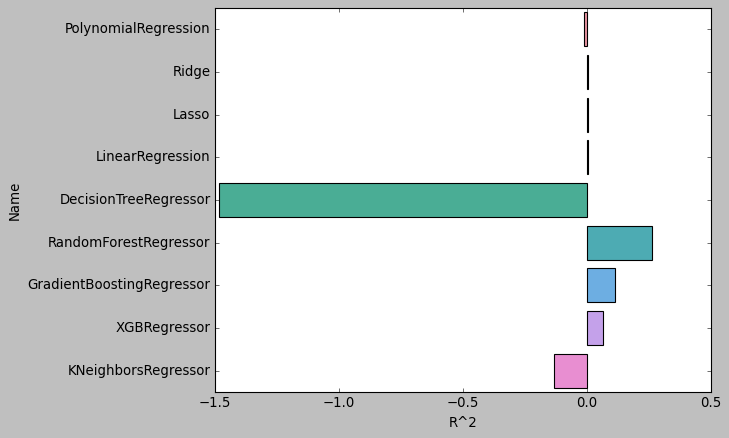

In [42]:
res = pd.DataFrame(np.array(results))
res.columns = ['Name', 'MAE', 'MSE', 'RMSE', 'R^2']
sns.barplot(data=res, y='Name', x='R^2')

In [43]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=10, step=1)
rfe.fit(X_train, y_train)

RFE(estimator=RandomForestRegressor(), n_features_to_select=10)

In [44]:
print(X.columns)
print(rfe.support_)
print(rfe.ranking_)

Index(['Coverage', 'Education', 'Income', 'Months Since Last Claim',
       'Number of Open Complaints', 'Total Claim Amount', 'Vehicle Size',
       'GenderM', 'StateCalifornia', 'StateNevada', 'StateOregon',
       'StateWashington', 'Location CodeSuburban', 'Location CodeUrban',
       'Policy TypePersonal Auto', 'Policy TypeSpecial Auto',
       'EmploymentStatusEmployed', 'EmploymentStatusMedical Leave',
       'EmploymentStatusRetired', 'EmploymentStatusUnemployed',
       'Marital StatusMarried', 'Marital StatusSingle'],
      dtype='object')
[ True  True  True  True  True  True  True  True False False False  True
 False False  True False False False False False False False]
[ 1  1  1  1  1  1  1  1  5 10  2  1 12  4  1  9 11  7 13  8  3  6]


In [45]:
for i in range(len(X.columns)):
    if (rfe.support_[i]):
        print(X.columns[i])

Coverage
Education
Income
Months Since Last Claim
Number of Open Complaints
Total Claim Amount
Vehicle Size
GenderM
StateWashington
Policy TypePersonal Auto


## 2)	Which clients provide the highest lifetime value

In [46]:
df.sort_values(by=['Customer Lifetime Value'], ascending=False).head(10)

,State,Customer Lifetime Value,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
5716,Oregon,83325.0,Extended,High School or Below,Employed,M,58958.0,Suburban,Married,231,31,74,0,2,Personal Auto,Personal L3,Offer1,Call Center,1109.0,Luxury Car,Small
1974,Washington,74229.0,Extended,High School or Below,Unemployed,M,0.0,Suburban,Single,242,1,34,0,2,Personal Auto,Personal L1,Offer1,Branch,1742.0,Luxury Car,Medsize
6252,California,73226.0,Extended,Bachelor,Employed,F,39547.0,Suburban,Married,202,11,21,0,2,Personal Auto,Personal L3,Offer1,Branch,970.0,Luxury SUV,Medsize
7283,Oregon,67907.0,Premium,Bachelor,Employed,M,78310.0,Rural,Married,192,34,18,1,2,Personal Auto,Personal L1,Offer1,Agent,152.0,Sports Car,Medsize
5279,Washington,66026.0,Basic,Bachelor,Employed,M,33481.0,Suburban,Single,188,28,46,0,2,Personal Auto,Personal L3,Offer1,Agent,1195.0,Luxury SUV,Medsize
7303,California,64619.0,Extended,High School or Below,Unemployed,M,0.0,Suburban,Married,217,14,40,1,2,Personal Auto,Personal L3,Offer1,Branch,1562.0,Luxury Car,Small
3760,Oregon,61850.0,Extended,College,Unemployed,F,0.0,Suburban,Married,238,19,29,0,2,Personal Auto,Personal L1,Offer3,Branch,1142.0,Luxury SUV,Medsize
8825,California,61135.0,Basic,College,Unemployed,M,0.0,Suburban,Single,198,2,75,0,2,Corporate Auto,Corporate L3,Offer2,Branch,2275.0,Luxury Car,Medsize
4126,Arizona,60556.0,Extended,College,Unemployed,F,0.0,Suburban,Married,204,35,45,0,2,Personal Auto,Personal L3,Offer1,Web,979.0,Luxury SUV,Large
2908,Arizona,58754.0,Premium,Bachelor,Employed,F,24964.0,Suburban,Married,185,0,84,0,2,Personal Auto,Personal L2,Offer2,Agent,888.0,SUV,Medsize


## 3)	Which clients are most likely to make a claim?

In [47]:
df_hc = dfc[dfc['Number of Open Complaints'] >= 5]

Running KMeans with 1 clusters
Running KMeans with 2 clusters
Running KMeans with 3 clusters
Running KMeans with 4 clusters
Running KMeans with 5 clusters
Running KMeans with 6 clusters
Running KMeans with 7 clusters
Running KMeans with 8 clusters
Running KMeans with 9 clusters
Running KMeans with 10 clusters
Running KMeans with 11 clusters
Running KMeans with 12 clusters
Running KMeans with 13 clusters
Running KMeans with 14 clusters
Running KMeans with 15 clusters
Running KMeans with 16 clusters
Running KMeans with 17 clusters
Running KMeans with 18 clusters
Running KMeans with 19 clusters
Running KMeans with 20 clusters
Running KMeans with 21 clusters
Running KMeans with 22 clusters
Running KMeans with 23 clusters


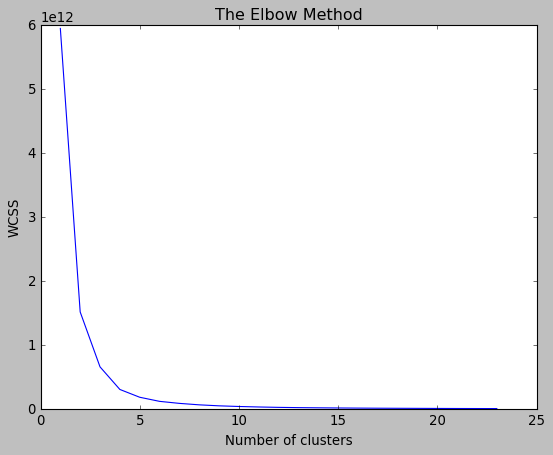

In [48]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 24):
    print("Running KMeans with %s clusters" % (i))
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 24), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # sum of squares of the distances of each data point in all clusters to their centroids
plt.show()

From the elbow method we can suggest that there are 4 distinct clusters

In [49]:
from sklearn.decomposition import PCA

# Create a PCA model to reduce our data to 2 dimensions for visualisation
pca = PCA(n_components=len(Xs[0]))
pca.fit(Xs)

# Transfor the scaled data to the new PCA space
X_reduced = pca.transform(Xs)

In [50]:
# Convert to a data frame
X_reduceddf = pd.DataFrame(X_reduced, index=X.index)
# X_reduceddf['cluster'] = clusters
X_reduceddf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,-0.961901,0.539735,0.405507,0.848462,0.087169,1.877752,1.355752,2.654474,-0.878803,0.506087,-0.105438,0.694999,-1.832081,0.394707,-1.076339,0.992301,-1.215608,-0.140439,-0.258995,-0.114928,-0.359934,-0.064140
2,-0.537890,1.304299,0.660853,0.044568,-1.624495,2.349513,-1.354210,-1.624827,1.248790,0.097818,-0.487255,0.937075,-1.398709,-0.419410,-0.979605,-0.347767,0.373111,-0.094926,-0.303583,-0.371215,-0.403762,-0.106628
4,-0.589466,-2.395190,-0.213009,-0.733721,-0.674269,1.294050,2.106073,2.062381,-0.804993,0.921252,-0.575208,0.370208,-0.075670,-1.293940,-0.200125,-0.852711,0.195277,-0.473311,-0.320843,-0.275085,0.825202,0.038787
5,-2.079768,-0.224885,1.571247,-0.842031,0.563861,-1.020343,0.166723,-0.128445,-0.076688,0.395022,0.391961,0.269947,-1.060920,-0.201997,-0.932926,-0.202963,0.264544,-0.443624,-0.205177,0.386374,0.614799,-0.014624
8,1.530596,1.312106,1.718500,0.541146,1.993223,-0.607893,0.748540,-0.352512,-0.479478,3.320706,-1.655385,-0.051627,2.145433,-0.564420,-0.804948,0.211573,-1.378672,1.043276,-0.330767,0.175457,0.145904,-0.173404


In [51]:
pca.explained_variance_ratio_.round(2)

array([0.17, 0.07, 0.07, 0.06, 0.06, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
       0.05, 0.04, 0.04, 0.04, 0.03, 0.03, 0.01, 0.01, 0.01, 0.01, 0.  ])

In [52]:
pca.explained_variance_ratio_.cumsum().round(2)

array([0.17, 0.23, 0.3 , 0.36, 0.42, 0.48, 0.53, 0.58, 0.63, 0.67, 0.72,
       0.77, 0.81, 0.85, 0.89, 0.92, 0.95, 0.96, 0.98, 0.99, 1.  , 1.  ])

In [53]:
from functions import *

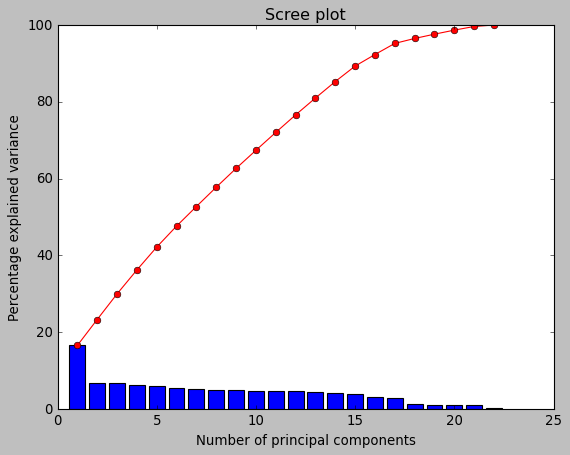

In [54]:
display_scree_plot(pca)

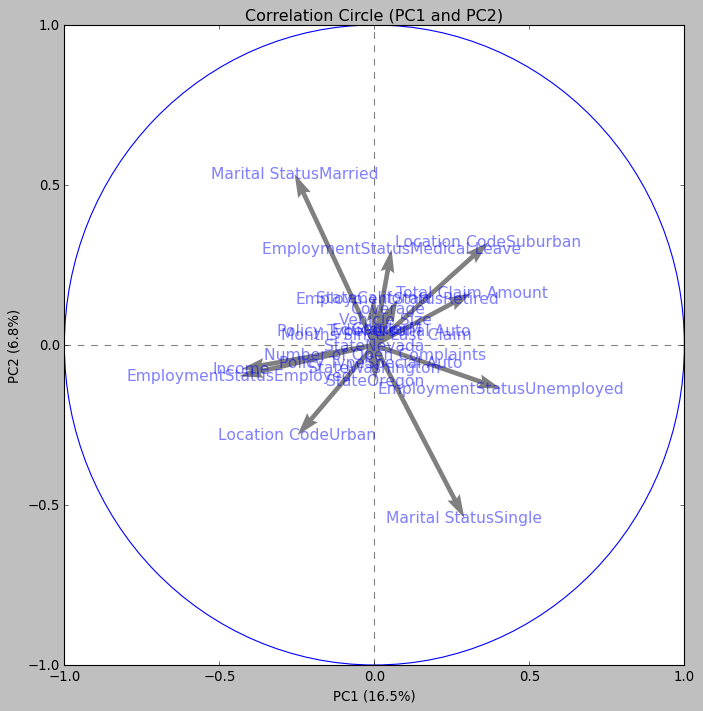

In [55]:
display_circles(pca.components_, 5, pca, [(0,1)], labels = np.array(X.columns),)

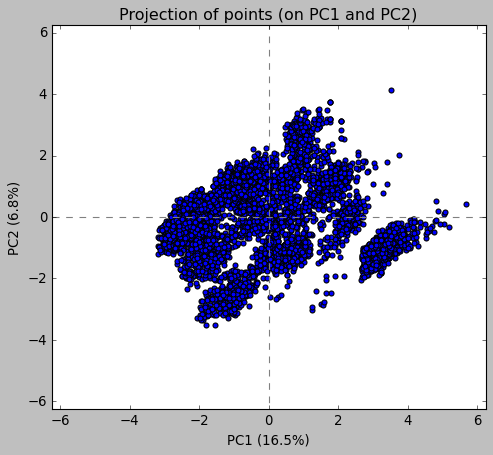

In [56]:
# Transform the original scaled data to the new vector space
X_projected = pca.transform(Xs) 

# Display a scatter plot of the data points in this new vector space
display_factorial_planes(X_projected, 24, pca, [(0,1)])
plt.show()

5)	Which clients are least valuable?

In [57]:
df.sort_values(by=['Customer Lifetime Value']).head(10)

,State,Customer Lifetime Value,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
6037,California,1898.0,Basic,Bachelor,Unemployed,M,0.0,Suburban,Single,67,15,91,3,1,Personal Auto,Personal L2,Offer1,Agent,414.0,Two-Door Car,Medsize
2210,Arizona,1899.0,Basic,College,Unemployed,F,0.0,Suburban,Single,70,17,20,5,1,Personal Auto,Personal L3,Offer3,Agent,702.0,Two-Door Car,Small
2771,California,1904.0,Basic,Bachelor,Unemployed,F,0.0,Suburban,Single,63,22,7,3,1,Personal Auto,Personal L1,Offer1,Agent,302.0,Four-Door Car,Medsize
7083,California,1918.0,Basic,College,Unemployed,M,0.0,Suburban,Single,61,2,54,2,1,Personal Auto,Personal L1,Offer1,Branch,439.0,Two-Door Car,Small
6711,Oregon,1941.0,Basic,High School or Below,Unemployed,M,0.0,Suburban,Single,66,5,40,3,1,Personal Auto,Personal L3,Offer3,Call Center,475.0,Two-Door Car,Large
5894,Arizona,1995.0,Basic,College,Unemployed,M,0.0,Suburban,Single,61,18,96,0,1,Personal Auto,Personal L1,Offer2,Web,393.0,Four-Door Car,Medsize
7135,Oregon,2004.0,Basic,College,Unemployed,F,0.0,Suburban,Divorced,66,16,35,4,1,Personal Auto,Personal L3,Offer1,Branch,317.0,Four-Door Car,Small
3665,Oregon,2004.0,Basic,College,Unemployed,F,0.0,Suburban,Divorced,66,16,35,4,1,Personal Auto,Personal L3,Offer1,Branch,317.0,Four-Door Car,Small
4818,California,2004.0,Basic,College,Unemployed,F,0.0,Suburban,Divorced,66,16,35,4,1,Corporate Auto,Corporate L3,Offer1,Branch,317.0,Four-Door Car,Small
1916,Oregon,2004.0,Basic,College,Unemployed,F,0.0,Suburban,Divorced,66,16,35,4,1,Special Auto,Special L2,Offer1,Branch,317.0,Four-Door Car,Small


Single unemployed customers